In [1]:
from helper import *
from datasetcreator import *
from dependencies import *
from loaddata import review_data,business_data, rest_data, user_data, elite_udata, non_elite_udata

User Data Loaded
Businesses Data Loaded
Review Data Loaded


In [23]:
def give_raw_text2(review_data, elitedata = False):
    review_data_ne = review_data.loc[review_data['iselite'] == elitedata]
    bid_2_textrev = review_data_ne.groupby('business_id')['text'].apply(list).to_dict()
    return bid_2_textrev

In [24]:
bid_2_text_elite = give_raw_text2(review_data, elitedata = True)
bid_2_text_non_elite = give_raw_text2(review_data, elitedata = False)

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()

In [5]:
sa.polarity_scores('I am hating it!')

{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5562}

In [8]:
def give_bids(min_thold, bdata, bid_2_stars, bid_2_stars_e):
    ans = []
    bids = bdata['business_id'].values
    for bid in bids:
        if bid in bid_2_stars and bid in bid_2_stars_e and len(bid_2_stars_e[bid]) >= min_thold:
              ans.append(bid)
    return ans

In [9]:
bid_2_stars_ne = review_data.loc[review_data['iselite'] == False].groupby('business_id')['stars'].apply(list).to_dict()
bid_2_stars_e = review_data.loc[review_data['iselite'] == True].groupby('business_id')['stars'].apply(list).to_dict()

In [13]:
bids = give_bids(40, business_data, bid_2_stars_ne, bid_2_stars_e)

In [18]:
list(sa.polarity_scores(bid_2_text_elite[bids[0]]).values())

[0.053, 0.81, 0.138, 1.0]

In [30]:
elite_sentiments = []
for i in range(len(bids)):
    for text in bid_2_text_elite[bids[i]]:
        elite_sentiments.append(list(sa.polarity_scores(text).values()))
    if i%100 == 0:
        print("Completed ", i)
        

Completed  0
Completed  100
Completed  200
Completed  300
Completed  400
Completed  500
Completed  600
Completed  700
Completed  800
Completed  900
Completed  1000
Completed  1100
Completed  1200
Completed  1300
Completed  1400
Completed  1500
Completed  1600
Completed  1700
Completed  1800
Completed  1900
Completed  2000
Completed  2100
Completed  2200
Completed  2300
Completed  2400
Completed  2500
Completed  2600
Completed  2700
Completed  2800
Completed  2900
Completed  3000
Completed  3100
Completed  3200
Completed  3300
Completed  3400
Completed  3500
Completed  3600
Completed  3700
Completed  3800
Completed  3900
Completed  4000
Completed  4100
Completed  4200
Completed  4300
Completed  4400
Completed  4500
Completed  4600
Completed  4700
Completed  4800
Completed  4900
Completed  5000
Completed  5100
Completed  5200
Completed  5300
Completed  5400
Completed  5500
Completed  5600
Completed  5700
Completed  5800
Completed  5900


In [31]:
pickle.dump( elite_sentiments , open( "sentiment_elite.p", "wb" ) )

In [33]:
len(elite_sentiments)

564922

In [34]:
non_elite_sentiments = []
for i in range(len(bids)):
    for text in bid_2_text_non_elite[bids[i]]:
        non_elite_sentiments.append(list(sa.polarity_scores(text).values()))
    if i%100 == 0:
        print("Completed ", i)

Completed  0
Completed  100
Completed  200
Completed  300
Completed  400
Completed  500
Completed  600
Completed  700
Completed  800
Completed  900
Completed  1000
Completed  1100
Completed  1200
Completed  1300
Completed  1400
Completed  1500
Completed  1600
Completed  1700
Completed  1800
Completed  1900
Completed  2000
Completed  2100
Completed  2200
Completed  2300
Completed  2400
Completed  2500
Completed  2600
Completed  2700
Completed  2800
Completed  2900
Completed  3000
Completed  3100
Completed  3200
Completed  3300
Completed  3400
Completed  3500
Completed  3600
Completed  3700
Completed  3800
Completed  3900
Completed  4000
Completed  4100
Completed  4200
Completed  4300
Completed  4400
Completed  4500
Completed  4600
Completed  4700
Completed  4800
Completed  4900
Completed  5000
Completed  5100
Completed  5200
Completed  5300
Completed  5400
Completed  5500
Completed  5600
Completed  5700
Completed  5800


TypeError: 'float' object is not iterable

In [36]:
len(non_elite_sentiments)

1866803

In [37]:
pickle.dump( non_elite_sentiments , open( "sentiment_non_elite.p", "wb" ) )

In [38]:
elite_sentiments = np.array(elite_sentiments)
non_elite_sentiments = np.array(non_elite_sentiments)

[0.03523794 0.78480585 0.17995689 0.8300631 ]


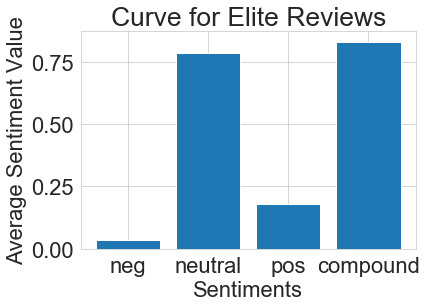

In [48]:
e_ans = np.mean(elite_sentiments, axis = 0)
print(e_ans)
plt.bar(['neg','neutral','pos', 'compound'], e_ans)
plt.xlabel('Sentiments')
plt.ylabel('Average Sentiment Value')
plt.title('Curve for Elite Reviews')
plt.show()

[0.04109263 0.74834471 0.21056222 0.68115416]


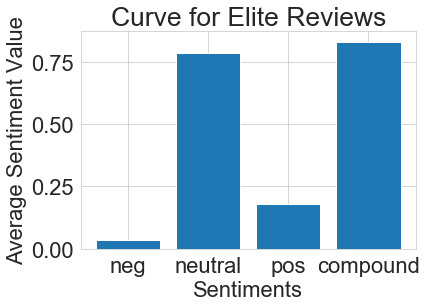

In [49]:
ne_ans = np.mean(non_elite_sentiments, axis = 0)
print(ne_ans)
plt.bar(['neg','neutral','pos', 'compound'], e_ans)
plt.xlabel('Sentiments')
plt.ylabel('Average Sentiment Value')
plt.title('Curve for Elite Reviews')
plt.show()

In [54]:
%matplotlib qt

# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(e_ans))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, e_ans, color='#7f6d5f', width=barWidth, edgecolor='white', label='Elite Reviews')
plt.bar(r2, ne_ans, color='#557f2d', width=barWidth, edgecolor='white', label='Non-Elite Reviews')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(e_ans))], ['Negative', 'Neutral', 'Positive',  'Compound'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [59]:
elite_sentiments[:,0]


array([0.056, 0.047, 0.   , ..., 0.   , 0.   , 0.054])

In [61]:
print(stats.ttest_ind(a=elite_sentiments[:,0],b=non_elite_sentiments[:,0],equal_var=False).pvalue)
print(stats.ttest_ind(a=elite_sentiments[:,1],b=non_elite_sentiments[:,1],equal_var=False).pvalue)
print(stats.ttest_ind(a=elite_sentiments[:,2],b=non_elite_sentiments[:,2],equal_var=False).pvalue)
print(stats.ttest_ind(a=elite_sentiments[:,3],b=non_elite_sentiments[:,3],equal_var=False).pvalue)

0.0
0.0
0.0
0.0
